In [ ]:
# martin's figure ide: h line with mean from all five lick intervals, then 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

# Figure 4b: temperature scores at different $\alpha$ values

In [2]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TempDat_temps_alphapoint000.pkl',
             'BayesScores_TempDat_temps_alphapoint125.pkl',
             'BayesScores_TempDat_temps_alphapoint250.pkl',
             'BayesScores_TempDat_temps_alphapoint375.pkl',
             'BayesScores_TempDat_temps_alphapoint500.pkl',
             'BayesScores_TempDat_temps_alphapoint625.pkl',
             'BayesScores_TempDat_temps_alphapoint750.pkl',
             'BayesScores_TempDat_temps_alphapoint875.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
nVSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores = np.concatenate((nVSscores, current_file[:, 1].reshape(-1, 1)), axis=1)
    print(f'filename {file_name} success')

filename BayesScores_TempDat_temps_alphapoint125.pkl success
filename BayesScores_TempDat_temps_alphapoint250.pkl success
filename BayesScores_TempDat_temps_alphapoint375.pkl success
filename BayesScores_TempDat_temps_alphapoint500.pkl success
filename BayesScores_TempDat_temps_alphapoint625.pkl success
filename BayesScores_TempDat_temps_alphapoint750.pkl success
filename BayesScores_TempDat_temps_alphapoint875.pkl success
filename BayesScores_TempDat_temps_alphaonepoint000.pkl success


In [3]:
scores_columns = nVSscores[:,1:]
scores_columns.shape

(433, 9)

In [4]:
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(scores_columns[:,i]))])-0.333) for i in range(9)]

print(top_20_means)

[(1, 0.17363597903337985), (2, 0.18352434629007824), (3, 0.18783777238873006), (4, 0.19531712588723532), (5, 0.20692142123469076), (6, 0.21974091807265544), (7, 0.2280618093843128), (8, 0.22453409476220693), (9, 0.20897079178611316)]


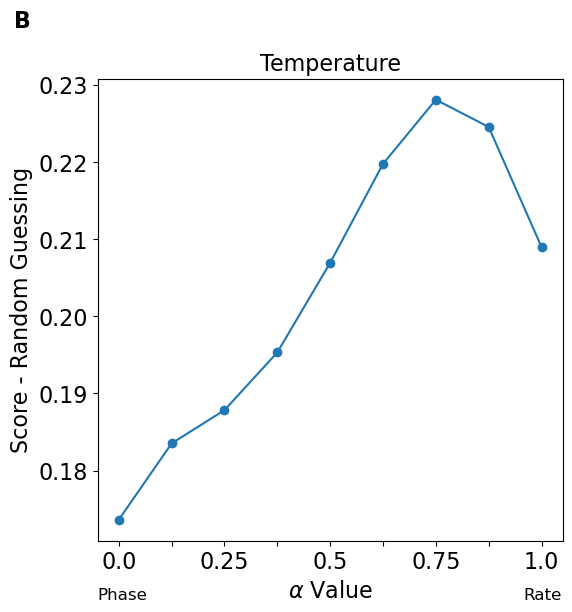

In [5]:
x_values, y_values = zip(*top_20_means)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='mean of the top 20% for each lick interval')
#ax.axhline(y=0.33, color='black', linestyle='--', label='random guessing')

ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')


tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.text(-0.18, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Temperature',fontsize = 16)
ax.set_xlabel(r'$\alpha$ Value',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### figure 5b: temperature classification scores as histogram

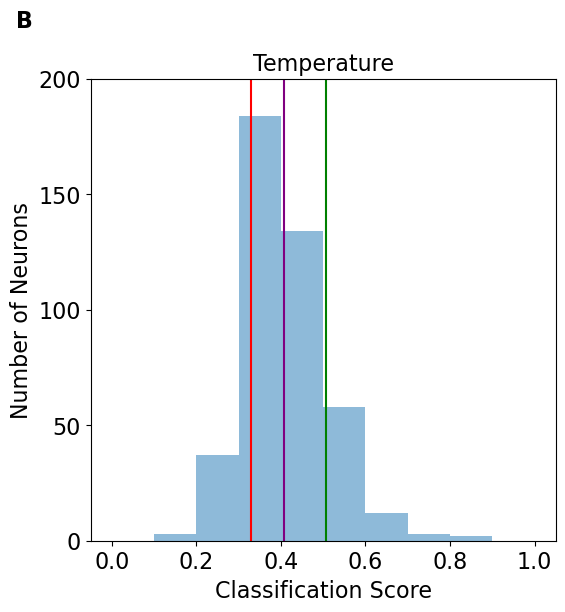

In [3]:

fig, ax = plt.subplots(figsize=(6, 6))
bin_loc = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.hist(neuron_vs_score[:, 1], bins=bin_loc, density=False, alpha=0.5)

# Add the letter 'A' to the top-left corner
plt.text(-0.16, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

plt.axvline(x=np.mean(neuron_vs_score[:, 1]), color='purple', label='mean score')
plt.axvline(x=(np.mean(neuron_vs_score[:, 1]) + abs(np.std(neuron_vs_score[:, 1]))), color='green', label='mean+std score')
plt.axvline(x=0.33, color='red', label='random guessing')
plt.title("Temperature", fontsize=16)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Uncomment the following line if you want to display the legend
# plt.legend(loc='upper right')

plt.xticks(fontsize=16)
plt.yticks([0, 50, 100, 150, 200], fontsize=16)
plt.ylabel('Number of Neurons', fontsize=16)
plt.xlabel('Classification Score', fontsize=16)
plt.show()

## temp and taste - third dataset not featured in paper

In [13]:
path = file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat'
scores_columns = pd.read_pickle(f'{path}/BayesScores_TempTaste_alphasearchresults.pkl')

In [14]:
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(scores_columns[:,i]))])-(1/6)) for i in range(9)]

print(top_20_means)

[(1, 0.12912765316925093), (2, 0.1342641135061395), (3, 0.13721183754339486), (4, 0.14281530652516686), (5, 0.15254934103384313), (6, 0.16499842858399985), (7, 0.17802369342950017), (8, 0.18007217942256457), (9, 0.17173192804933748)]


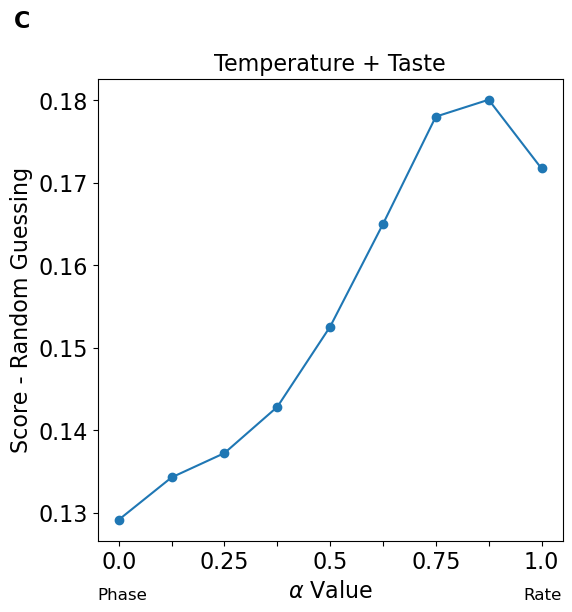

In [15]:
x_values, y_values = zip(*top_20_means)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='mean of the top 20% for each lick interval')
#ax.axhline(y=0.33, color='black', linestyle='--', label='random guessing')

tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.text(-0.18, 1.15, 'C', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')


ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Temperature + Taste',fontsize = 16)
ax.set_xlabel(r'$\alpha$ Value',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)

plt.show()

# Fig8C RHS - temperatures at different $\alpha$ values for each lick interval

In [16]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TempDat_temps_alphapoint000_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint125_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint250_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint375_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint500_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint625_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint750_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li0.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000_li0.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
n0VSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    n0VSscores = np.concatenate((n0VSscores, current_file[:, 1].reshape(-1, 1)), axis=1)
    
scores_0columns = n0VSscores[:,1:]
top_20_0means = [(i+1,np.mean(np.sort(scores_0columns[:,i])[::-1][:int(0.2*len(scores_0columns[:,i]))])-0.33) for i in range(9)]

In [17]:
file_names = ['BayesScores_TempDat_temps_alphapoint000_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint125_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint250_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint375_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint500_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint625_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint750_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li1.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000_li1.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
n1VSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    n1VSscores = np.concatenate((n1VSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

scores_1columns = n1VSscores[:,1:]
top_20_1means = [(i+1,np.mean(np.sort(scores_1columns[:,i])[::-1][:int(0.2*len(scores_1columns[:,i]))])-0.33) for i in range(9)]

In [18]:
file_names = ['BayesScores_TempDat_temps_alphapoint000_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint125_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint250_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint375_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint500_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint625_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint750_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li2.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000_li2.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
n2VSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    n2VSscores = np.concatenate((n2VSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

scores_2columns = n2VSscores[:,1:]
top_20_2means = [(i+1,np.mean(np.sort(scores_2columns[:,i])[::-1][:int(0.2*len(scores_2columns[:,i]))])-0.33) for i in range(9)]

In [19]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TempDat_temps_alphapoint000_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint125_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint250_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint375_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint500_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint625_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint750_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li3.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000_li3.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
n3VSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    n3VSscores = np.concatenate((n3VSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

scores_3columns = n3VSscores[:,1:]
top_20_3means = [(i+1,np.mean(np.sort(scores_3columns[:,i])[::-1][:int(0.2*len(scores_3columns[:,i]))])-0.33) for i in range(9)]

In [20]:
file_names = ['BayesScores_TempDat_temps_alphapoint000_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint125_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint250_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint375_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint500_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint625_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint750_li4.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li4.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000_li4.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
n4VSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    n4VSscores = np.concatenate((n4VSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

scores_4columns = n4VSscores[:,1:]
top_20_4means = [(i+1,np.mean(np.sort(scores_4columns[:,i])[::-1][:int(0.2*len(scores_4columns[:,i]))])-0.33) for i in range(9)]

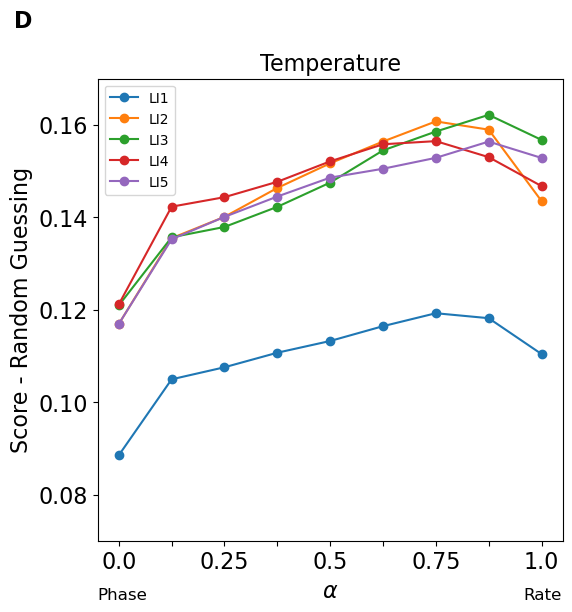

In [21]:
x_values0, tempy_values0 = zip(*top_20_0means)
x_values1, tempy_values1 = zip(*top_20_1means)
x_values2, tempy_values2 = zip(*top_20_2means)
x_values3, tempy_values3 = zip(*top_20_3means)
x_values4, tempy_values4 = zip(*top_20_4means)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values0, tempy_values0, marker='o', label='LI1')
ax.plot(x_values1, tempy_values1, marker='o', label='LI2')
ax.plot(x_values2, tempy_values2, marker='o', label='LI3')
ax.plot(x_values3, tempy_values3, marker='o', label='LI4')
ax.plot(x_values4, tempy_values4, marker='o', label='LI5')


#ax.axhline(y=0.33, color='black', linestyle='--', label='random guessing')

ax.text(-0.18, 1.15, 'D', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.set_ylim(0.07, 0.17)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Temperature',fontsize = 16)
# Adding labels and title
ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)


ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')


#ax.set_title('Changing alpha: Temperatures')
#ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
#ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
ax.legend(loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.axis('off')
plt.savefig("temp_li_alpha.svg")
# Display the plot
plt.show()

In [41]:
tempdiff2_1 = np.array(tempy_values2) - np.array(tempy_values1)
tempdiff2_1

array([ 0.00402211,  0.00019311, -0.00218782, -0.00408653, -0.00416998,
       -0.00192699, -0.0021954 ,  0.00320353,  0.01323229])

# fig 4a: taste data at different $\alpha$ values

In [2]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_taste_nowater_alphapoint000.pkl',
             'BayesScores_taste_nowater_alphapoint125.pkl',
             'BayesScores_taste_nowater_alphapoint250.pkl',
             'BayesScores_taste_nowater_alphapoint375.pkl',
             'BayesScores_taste_nowater_alphapoint500.pkl',
             'BayesScores_taste_nowater_alphapoint625.pkl',
             'BayesScores_taste_nowater_alphapoint750.pkl',
             'BayesScores_taste_nowater_alphapoint875.pkl',
             'BayesScores_taste_nowater_alphaonepoint000.pkl']
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/'
nVSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores = np.concatenate((nVSscores, current_file[:, 1].reshape(-1, 1)), axis=1)
    print(f'filename {file_name} success')
print(nVSscores)

filename BayesScores_taste_nowater_alphapoint125.pkl success
filename BayesScores_taste_nowater_alphapoint250.pkl success
filename BayesScores_taste_nowater_alphapoint375.pkl success
filename BayesScores_taste_nowater_alphapoint500.pkl success
filename BayesScores_taste_nowater_alphapoint625.pkl success
filename BayesScores_taste_nowater_alphapoint750.pkl success
filename BayesScores_taste_nowater_alphapoint875.pkl success
filename BayesScores_taste_nowater_alphaonepoint000.pkl success
[[0.00000000e+00 5.70370370e-01 6.33333333e-01 ... 6.37037037e-01
  6.33333333e-01 5.03703704e-01]
 [1.00000000e+00 2.85185185e-01 3.40740741e-01 ... 3.62962963e-01
  3.37037037e-01 3.55555556e-01]
 [2.00000000e+00 2.59259259e-01 2.81481481e-01 ... 2.81481481e-01
  3.03703704e-01 3.00000000e-01]
 ...
 [5.26000000e+02 3.22222222e-01 3.22222222e-01 ... 2.96296296e-01
  3.22222222e-01 3.22222222e-01]
 [5.27000000e+02 2.37037037e-01 3.11111111e-01 ... 3.03703704e-01
  2.85185185e-01 2.88888889e-01]
 [5.28000

In [3]:
scores_columns = nVSscores[:,1:]
scores_columns.shape

(529, 9)

In [62]:
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(scores_columns[:,i]))])-0.25) for i in range(9)]

print(top_20_means)

[(1, 0.12238596062206564), (2, 0.13028242423075093), (3, 0.1282399517611813), (4, 0.13010341467521186), (5, 0.1312935768399427), (6, 0.14096516786351665), (7, 0.148643673693799), (8, 0.15114194671720832), (9, 0.1415324643277613)]


In [63]:
overall_means = [(i+1,np.mean(scores_columns[:,i])) for i in range(9)]

print(overall_means)

[(1, 0.2682306206112002), (2, 0.2753533430580198), (3, 0.27384355738354754), (4, 0.2754678369778565), (5, 0.2756521051395574), (6, 0.27978887088213344), (7, 0.2796448970517544), (8, 0.28236604205215754), (9, 0.28367295432714734)]


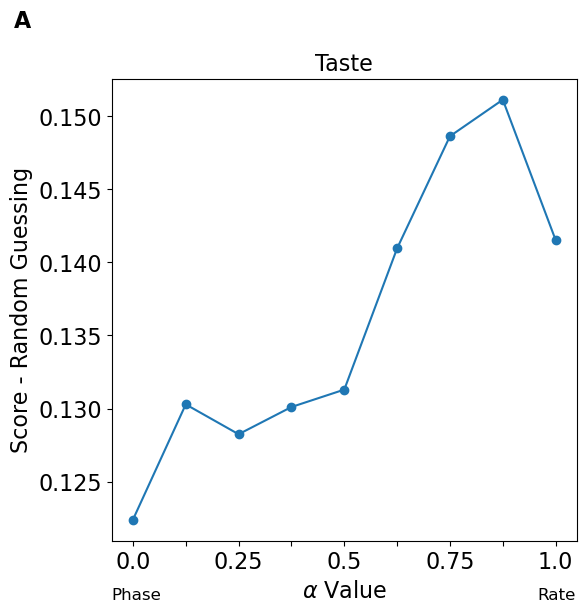

In [64]:
x_values, y_values = zip(*top_20_means)
#x_values2, y_values2 = zip(*overall_means)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='mean of the top 20% for each lick interval')
#ax.plot(x_values2, y_values2, marker='o', label='mean of the top 20% for each lick interval')
#ax.axhline(y=0.25, color='black', linestyle='--', label='random guessing')


ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')

tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.text(-0.21, 1.15, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Taste',fontsize = 16)
ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# fig 8C LHS: taste data at different $\alpha$ values for all 5 lick intervals

In [22]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TasteDat_taste_012_allLI_allAlpha.pkl',
             'BayesScores_TasteDat_taste_013_allLI_allAlpha.pkl',
             'BayesScores_TasteDat_taste_032_allLI_allAlpha.pkl',
              'BayesScores_TasteDat_taste_312_allLI_allAlpha.pkl',]
file_path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/'
nVSscores = []

for file_name in file_names:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores.append(current_file)

print(len(nVSscores))

4


In [23]:
average_array = (nVSscores[0] + nVSscores[1] + nVSscores[2] + nVSscores[3]) / 4
average_array.shape

(5, 529, 9)

This is telling us information in the form of (lick interval, neuron, alpha_value).
Now, average array contains the average classification scores from all possible 3-taste experiments 

In [24]:
average_array[0,:,:].shape

(529, 9)

In [31]:
scores_0columns = average_array[0,:,:]
top_20_0meanstaste = [(i+1,np.mean(np.sort(scores_0columns[:,i])[::-1][:int(0.2*len(scores_0columns[:,i]))])-0.33) for i in range(9)]
top_20_0meanstaste

[(1, 0.075253785896643),
 (2, 0.07542562530062519),
 (3, 0.07630570751999322),
 (4, 0.07729749945821368),
 (5, 0.07817905375048229),
 (6, 0.07988098211312489),
 (7, 0.08048580586080584),
 (8, 0.08109917595631883),
 (9, 0.0767427722189627)]

In [32]:
scores_1columns = average_array[1,:,:]
top_20_1meanstaste = [(i+1,np.mean(np.sort(scores_1columns[:,i])[::-1][:int(0.2*len(scores_1columns[:,i]))])-0.33) for i in range(9)]
top_20_1meanstaste

[(1, 0.08906461924319065),
 (2, 0.09634555567888903),
 (3, 0.09696682065729689),
 (4, 0.09830730468825699),
 (5, 0.09993660396041343),
 (6, 0.10157898979327551),
 (7, 0.10248734334448628),
 (8, 0.10470370017989067),
 (9, 0.10388042777328493)]

In [33]:
scores_2columns = average_array[2,:,:]
top_20_2meanstaste = [(i+1,np.mean(np.sort(scores_2columns[:,i])[::-1][:int(0.2*len(scores_2columns[:,i]))])-0.33) for i in range(9)]
top_20_2meanstaste

[(1, 0.09363541242707907),
 (2, 0.10161336679193816),
 (3, 0.10383868380296951),
 (4, 0.10563032602318317),
 (5, 0.10714733282590427),
 (6, 0.10849562342419483),
 (7, 0.11055952513095374),
 (8, 0.11327245373673944),
 (9, 0.1140564534671677)]

In [34]:
scores_3columns = average_array[3,:,:]
top_20_3meanstaste = [(i+1,np.mean(np.sort(scores_3columns[:,i])[::-1][:int(0.2*len(scores_3columns[:,i]))])-0.33) for i in range(9)]
top_20_3meanstaste

[(1, 0.09023006094434671),
 (2, 0.09487645885860174),
 (3, 0.09730514921586342),
 (4, 0.0985893048750191),
 (5, 0.09998599614671039),
 (6, 0.10071324046324048),
 (7, 0.10202668495525635),
 (8, 0.1056573624787911),
 (9, 0.1128002486931059)]

In [35]:
scores_4columns = average_array[4,:,:]
top_20_4meanstaste = [(i+1,np.mean(np.sort(scores_4columns[:,i])[::-1][:int(0.2*len(scores_4columns[:,i]))])-0.33) for i in range(9)]
top_20_4meanstaste

[(1, 0.08336651840223269),
 (2, 0.09078468489182773),
 (3, 0.09230872698729842),
 (4, 0.09419171437028584),
 (5, 0.09649068325854038),
 (6, 0.09817030456316173),
 (7, 0.10131180657966371),
 (8, 0.10455019781805497),
 (9, 0.10831761360332792)]

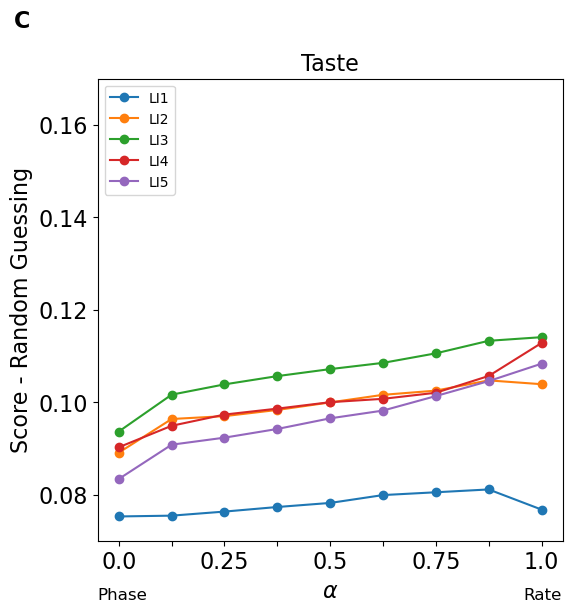

In [36]:
x_values0, y_values0 = zip(*top_20_0meanstaste)
x_values1, y_values1 = zip(*top_20_1meanstaste)
x_values2, y_values2 = zip(*top_20_2meanstaste)
x_values3, y_values3 = zip(*top_20_3meanstaste)
x_values4, y_values4 = zip(*top_20_4meanstaste)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values0, y_values0, marker='o', label='LI1')
ax.plot(x_values1, y_values1, marker='o', label='LI2')
ax.plot(x_values2, y_values2, marker='o', label='LI3')
ax.plot(x_values3, y_values3, marker='o', label='LI4')
ax.plot(x_values4, y_values4, marker='o', label='LI5')


#ax.axhline(y=0.25, color='black', linestyle='--', label='random guessing')

ax.text(-0.18, 1.15, 'C', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.set_ylim(0.07, 0.17)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Taste',fontsize = 16)
# Adding labels and title
ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)


ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')

#ax.set_title('Changing alpha: Temperatures')
#ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
#ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.3))
ax.legend(loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
#plt.axis('off')
plt.savefig("taste_LI_Alpha.svg")
plt.show()

# Fig 8d: plot difference between scores for LI2 and 3

In [39]:
tastediff2_1 = np.array(y_values2) - np.array(y_values1)
tastediff2_1

array([0.00457079, 0.00526781, 0.00687186, 0.00732302, 0.00721073,
       0.00691663, 0.00807218, 0.00856875, 0.01017603])

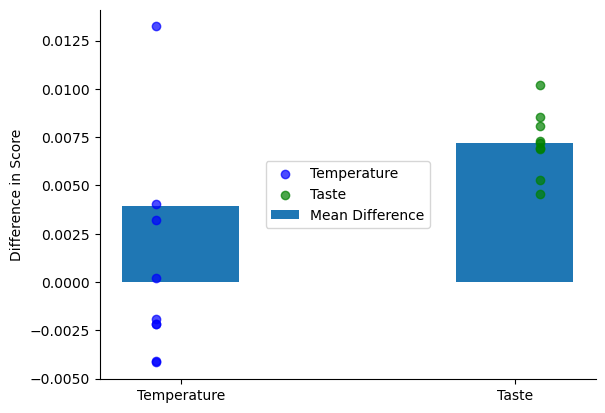

In [46]:
mean_temp_diff = np.mean(tempdiff2_1)
mean_taste_diff=np.mean(tastediff2_1)

# Create figure and axes
fig, ax = plt.subplots()

# Barplot
bar_width = 0.35
index = np.arange(2)
bars = ax.bar(index, [mean_temp_diff, mean_taste_diff], bar_width, label='Mean Difference')

# Scatter plot with jitter
jitter = 0.15
ax.scatter(np.zeros_like(tempdiff2_1) - jitter/2, tempdiff2_1, alpha=0.7, label='Temperature', color='b')
ax.scatter(np.ones_like(tastediff2_1) + jitter/2, tastediff2_1, alpha=0.7, label='Taste', color='g')

# Add labels, title, legend
#ax.set_xlabel('Categories')
ax.set_ylabel('Difference in Score')
#ax.set_title('Mean Temperature and Taste Difference')
ax.set_xticks(index)
ax.set_xticklabels(['Temperature', 'Taste'])
ax.legend(loc='center')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

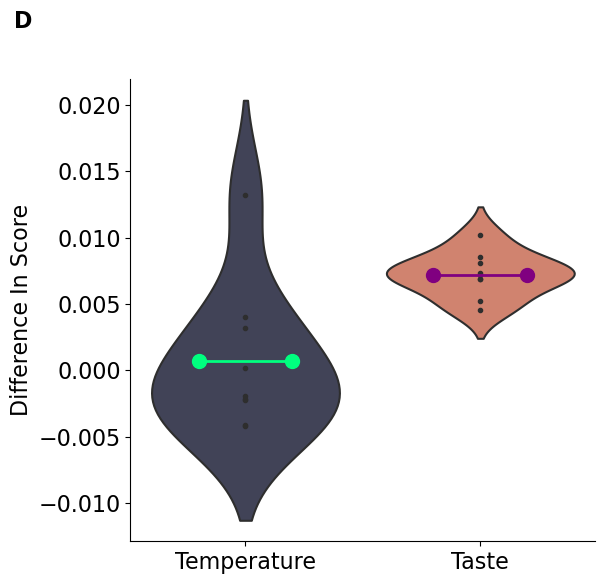

In [97]:
import seaborn as sns
mean_temp_diff = np.mean(tempdiff2_1)
mean_taste_diff = np.mean(tastediff2_1)

data = pd.DataFrame({
    ' ': ['Temperature'] * len(tempdiff2_1) + ['Taste'] * len(tastediff2_1),
    'Difference In Score': np.concatenate([tempdiff2_1, tastediff2_1])
})

# Create custom color palette
custom_palette = sns.color_palette(['#3D405B', '#E07A5F'])

# Create violin plot with custom colors
plt.figure(figsize=(6, 6))
sns.violinplot(x=' ', y='Difference In Score', data=data, inner='point', linewidth=1.5, alpha=0.5, scale='width', scale_hue=False, palette=custom_palette)

# Plot mean points with full opacity
plt.plot([-0.2, 0.2], [mean_temp_diff, mean_temp_diff], color='springgreen', linestyle='-', linewidth=2, marker='o', markersize=10, label='Mean Temperature')
plt.plot([0.8, 1.2], [mean_taste_diff, mean_taste_diff], color='purple', linestyle='-', linewidth=2, marker='o', markersize=10, label='Mean Taste')

# Add labels and title
plt.ylabel('Difference In Score', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('')
#plt.title('Temperature and Taste Differences')

# Create axes object
ax = plt.gca()

# Add text annotation 'D'
ax.text(-0.25, 1.15, 'D', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("LI_21_differences_plot.svg")
plt.show()

In [57]:
from scipy import stats    
    
print(stats.ttest_ind(tastediff2_1,tempdiff2_1, equal_var=False))

TtestResult(statistic=3.396806087943962, pvalue=0.007379642075940499, df=9.447478489599614)
